# Diagrama de fases de sustancias puras

En esta sección se presenta una forma de obtener las ecuaciones necesarias para realizar el cálculo del diagrama de fases de usa sustancia pura utilizando un algoritmo de continuación (Allgower & Georg, 2003, Cismondi & Michelsen, 2007, Cismondi et. al, 2008).

La implementación de este algoritmo de solución de las ecuaciones resultantes del equilibrio de fases son implementadas como un método de la librería pyther.

9.1 Sistema de Ecuaciones
----------------------------

Se parte de las ecuaciones que surgen de la condición de equilibrio de fases para una sustancia pura, sin embargo, el enfoque que se utiliza corresponde a tener como variables del sistema de ecuaciones al logaritmo natural de la temperatura $T$ y los volumenes de líquido $V_l$ y vapor $V_v$. Adicionalmente, se tiene una ecuación correspondiente a la especificación de un valor de alguna de las variables del sistema de ecuaciones danto lugar a un sistema de 3 ecuaciones con la forma que se muestra a continuación:

$$ F = 
\begin{bmatrix}
ln \left( \frac{P^l(T, V^l)} {P^v(T, V^v)} \right)\\
ln f_l(T, V^l) - ln f_v(T, V^v)\\
X_S - S
\end{bmatrix}
$$

Por tanto la solución del sistema de ecuaciones se puede obtener como:

$$ Jx 
\begin{bmatrix}
\Delta ln T\\
\Delta ln V^l\\
\Delta ln V^v\\
\end{bmatrix}
+ F = 0$$

siendo 
$$ \Lambda = 
\begin{bmatrix}
\Delta ln T\\
\Delta ln V^l\\
\Delta ln V^v\\
\end{bmatrix}
$$

en donde cada elemento de la matriz $Jx$, salvo la última fila que son cero, tienen la siguiente forma:

$$ Jx_{1,1} = T \left( \frac {\left(\frac{\partial P_{x} }{\partial T}\right)} {P_l} - \frac {\left(\frac{\partial P_{y} }{\partial T}\right)} {P_v}  \right) $$

$$ Jx_{1,2} = -V_l \left( \frac {\left(\frac{\partial P }{\partial V_{x}}\right)} {P_l} \right) $$

$$ Jx_{1,3} = -V_v \left( \frac {\left(\frac{\partial P }{\partial V_{y}}\right)} {P_v} \right) $$

$$ Jx_{2,1} = T \left(\left(\frac{\partial f^l } {\partial T} \right) - \left(\frac{\partial f^v } {\partial T} \right) \right) $$

$$ Jx_{2,2} = V_l \left(\frac{\partial f^l } {\partial V_{l}} \right) $$

$$ Jx_{2,3} = - V_v \left(\frac{\partial f^y } {\partial V_{v}} \right) $$

Matriz de primeras derivadas parciales

$$J_x =  \begin{bmatrix}
T \left( \frac {\left(\frac{\partial P_{x} }{\partial T}\right)} {P_l} - \frac {\left(\frac{\partial P_{y} }{\partial T}\right)} {P_v}  \right) & 
-V_l \left( \frac {\left(\frac{\partial P_{x} }{\partial V}\right)} {P_l} \right) & 
-V_v \left( \frac {\left(\frac{\partial P_{y} }{\partial V}\right)} {P_y} \right) \\
    T \left(\left(\frac{\partial f^l } {\partial T} \right) - \left(\frac{\partial f^v } {\partial T} \right) \right) & V_l \left(\frac{\partial f^l } {\partial V_{l}} \right) & - V_v \left(\frac{\partial f^y } {\partial V_{v}} \right) &   \\
    0       & 0 & 0 &  
\end{bmatrix}$$

una vez que se obtiene la solución del sistema de ecuaciones planteado, se procede con un método de continuación para obtener un valor inicial de un siguiente punto partiendo de la solución previamente encontrada y de esta forma repetir el procedimiento, siguiendo la descripción que se muestra más adelante.

9.2 Descripción del algoritmo
----------------------------

La descripción del algoritmo es tomada de Pisoni, Gerardo Oscar (2014):

$$ Jx\left(\frac{d\Lambda}{dS_{Spec}}\right) + \left(\frac{dF}{dS_{Spec}}\right) = 0 $$

Donde $J_x$ es la matriz jacobiana de la función vectorial $F$, $\Lambda$ es el vector de variables del sistema $F=0$, $S_{Spec}$ es el valor asignado a una de las variables del vector $\Lambda$, $\frac{d\Lambda}{ dS_{Spec}}$ es la derivada, manteniendo la condición $F=0$, del vector de variables con respecto al parámetro $S_{spec}$. Observe que si $S_{spec}=\Lambda_i$, entonces $\frac{d\Lambda_i} {dS_{Spec}} =1$. El vector $\frac{d\Lambda}{ dS_{Spec}}$ es llamado “vector de sensitividades”.

$\frac{\partial F} {\partial S_{Spec}}$ es la derivada parcial del vector de funciones $F$ con respecto la variable $S_{spec}$.

La matriz jacobiana $J_x$ debe ser valuada en un punto ya convergido que es solución del sistema de ecuaciones $F=0$. Observe en los distintos sistemas de ecuaciones presentados en el capítulo 3, que sólo una componente del vector $F$ depende explícitamente de $S_{spec}$. Por tanto, las componentes del vector $\frac{\partial F} {\partial S_{Spec}}$ son todas iguales a cero, excepto la que depende de $S_{spec}$, en esta tesis el valor de dicha componente es siempre $“-1”$.

Conocidos $J_x$ y $\frac{\partial F} {\partial S_{Spec}}$ es posible calcular todas las componentes del vector $\frac{d\Lambda}{ dS_{Spec}}$.

Con $\frac{d\Lambda}{ dS_{Spec}}$ conocido es posible predecir los valores de todas las variables del vector $\Lambda$ para el siguiente punto de la “hiper-línea" que se está calculando, aplicando la siguiente ecuación:

$$ \Lambda_{next point}^0  = \Lambda_{conve. pont} + \left(\frac{d\Lambda}{dS_{Spec}}\right) \Delta S_{Spec} $$

Aquí $\Lambda_{next point}^0$ corresponde al valor inicial del vector $\Lambda$ para el próximo punto a ser calculado. $\Lambda_{conve. pont}$ es el valor del vector $\Lambda$ en el punto ya convergido.

Por otra parte, el vector de sensitividades $\frac{d\Lambda}{ dS_{Spec}}$ provee información sobre la próxima variable que debe ser especificada en el próximo punto a ser calculado. La variable a especificar corresponderá a la componente del vector $\frac{d\Lambda}{dS_{Spec}}$ de mayor valor absoluto. Supongamos que la variable especificada para el punto convergido fue la presión $P$, es decir en el punto convergido $S_{spec} = P$.

9.3 Implementación del Algoritmo
-------------------------------

A continuación se muestra la forma de utilizar la librería pyther para realizar el diagrama de fases de una sustancia pura.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyther as pt

Luego de hacer la importación de las librerías que se van a utilizar, en la función main_eos() definida por un usuario se realiza la especificación de la sustancia pura junto con el modelo de ecuación de estado y parámetros que se requieren en la función "pt.function_elv(components, Vc, Tc, Pc, omega, k, d1)" que realiza los cálculos del algoritmo que se describió previamente. 

In [3]:
def main_eos():
    print("-" * 79)
    components = ["METHANE"]
    MODEL = "PR"
    specification = "constants"
    component_eos = pt.parameters_eos_constans(components, MODEL, specification)
    #print(component_eos)
    #print('-' * 79)
    
    methane = component_eos[component_eos.index==components]
    #print(methane)    
    methane_elv = methane[["Tc", "Pc", "k", "d1"]]
    #print(methane_elv)
    
    Tc = np.array(methane["Tc"])
    Pc = np.array(methane["Pc"])
    Vc = np.array(methane["Vc"])
    omega = np.array(methane["Omega"])
    k = np.array(methane["k"])
    d1 = np.array(methane["d1"])
    
    punto_critico = np.array([Pc, Vc])
    
    print("Tc main = ", Tc)
    print("Pc main = ", Pc)
    print("punto critico = ", punto_critico)
    
    data_elv = pt.function_elv(components, Vc, Tc, Pc, omega, k, d1)
    #print(data_elv)
    
    return data_elv, Vc, Pc

9.4 Resultados
-----------------

Se obtiene el diagrama de fases líquido-vapor de una sustancia pura utilizando el método function_elv(components, Vc, Tc, Pc, omega, k, d1) de la librería pyther. Se observa que la función anterior main_eos() puede ser reemplazada por un bloque de widgets que simplifiquen la interfaz gráfica con los usuarios. 

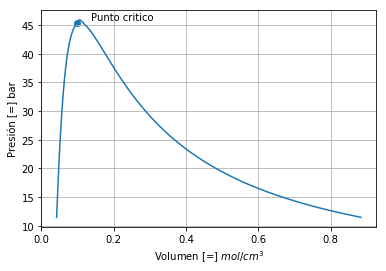

In [10]:
volumen = envolvente[0][0]
presion = envolvente[0][1]
Vc, Pc = envolvente[1], envolvente[2]

plt.plot(volumen,presion)
plt.scatter(Vc, Pc)

plt.xlabel('Volumen [=] $mol/cm^3$')
plt.ylabel('Presión [=] bar')
plt.grid(True)
plt.text(Vc * 1.4, Pc * 1.01, "Punto critico")

9.5 Referencias
-----------------

[1] E.L. Allgower, K. Georg, Introduction to Numerical Continuation Methods, SIAM. Classics in Applied Mathematics, Philadelphia, 2003.

[2] M. Cismondi, M.L. Michelsen, Global phase equilibrium calculations: Critical lines, critical end points and liquid-liquid-vapour equilibrium in binary mixtures, Journal of Supercritical Fluids, 39 (2007) 287-295.

[3] M. Cismondi, M.L. Michelsen, M.S. Zabaloy, Automated generation of phase diagrams for binary systems with azeotropic behavior, Industrial and Engineering Chemistry Research, 47 (2008) 9728-9743.

[4] Pisoni, Gerardo Oscar (2014). Mapas Característicos del Equilibrio entre Fases para Sistemas Ternarios (tesis doctoral). Universidad Nacional del Sur, Argentina.